In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager
import matplotlib.patches as patches
import geopandas as gpd
from scipy.stats import rankdata

#for paths
import os

#set root folder
project_root = os.path.abspath(os.getcwd())

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Setup 

In [14]:
#dictionary of London boroughs and their ONS codes
pos_dict = {'E09000001': 29,  'E09000002': 32, 'E09000003': 12, 'E09000004': 40,  'E09000005': 19, 'E09000006': 46,
           'E09000007': 20, 'E09000008': 45,  'E09000009': 18,  'E09000010': 5,  'E09000011': 39,  'E09000012': 22,
           'E09000013': 26,  'E09000014': 13,  'E09000015': 11,  'E09000016': 24, 'E09000017': 17,  'E09000018': 25,
           'E09000019': 21,  'E09000020': 27,  'E09000021': 43, 'E09000022': 36,  'E09000023': 38,  'E09000024': 44,
           'E09000025': 31,  'E09000026': 23,  'E09000027': 34,  'E09000028': 37,  'E09000029': 52,  'E09000030': 30,
           'E09000031': 14,  'E09000032': 35,  'E09000033': 28}

display_dict = {'E09000007': 'CMD', 'E09000001': 'CTY', 'E09000012': 'HCK', 'E09000013': 'HMS', 'E09000014': 'HGY',
             'E09000019': 'ISL', 'E09000020': 'KNS', 'E09000022': 'LAM', 'E09000023': 'LSH', 'E09000025': 'NWM',
             'E09000028': 'SWR', 'E09000030': 'TOW', 'E09000032': 'WNS', 'E09000033': 'WST', 'E09000002': 'BAR',
             'E09000003': 'BRN', 'E09000004': 'BXL',  'E09000005': 'BRT',  'E09000006': 'BRM',  'E09000008': 'CRD',
             'E09000009': 'ELG',  'E09000010': 'ENF',  'E09000011': 'GRN',  'E09000015': 'HRW',  'E09000016': 'HVG',
             'E09000017': 'HDN',  'E09000018': 'HNS',  'E09000021': 'KNG',  'E09000024': 'MRT',  'E09000026': 'RDB',
             'E09000027': 'RCH',  'E09000029': 'STN',  'E09000031': 'WTH'}

# Data preparation

In [50]:
#load data
#read in each tab and merge into one table
df_any = pd.read_excel(os.path.join(project_root, "data\\cw0302.xlsx"), sheet_name="CW0302_Any_Purpose", skiprows=7)
df_leisure = pd.read_excel(os.path.join(project_root, "data\\cw0302.xlsx"), sheet_name="CW0302_Leisure", skiprows=7)
df_travel = pd.read_excel(os.path.join(project_root, "data\\cw0302.xlsx"), sheet_name="CW0302_Travel", skiprows=7)
df = pd.concat([df_any, df_leisure, df_travel])

In [51]:
# filter for London boroughs and London wide
area_filter = list(pos_dict.keys())
for area in ["E92000001", "E12000007", "E13000001", "E13000002"]:
    area_filter.append(area)
    
df = df[df["ONS Code"].isin(area_filter)]

In [37]:
df

,ONS Code,Area name,Mode,Purpose,Frequency,2021,2020,2019,2018,2017,2016,Display name,pos
0,E92000001,England,Cycling,Any,At least once per month,13.148585,16.0952,16.05838,16.0966,16.8774,17.1082,NaN,NaN
1,E92000001,England,Cycling,Any,At least once per week,9.146141,11.6155,11.220882,11.4848,11.8555,11.903,NaN,NaN
2,E92000001,England,Cycling,Any,At least 3 times per week,3.948726,5.3087,5.320626,5.5048,5.6748,5.6702,NaN,NaN
3,E92000001,England,Cycling,Any,At least 5 times per week,2.145250,2.9789,3.170456,3.3369,3.3673,3.3718,NaN,NaN
840,E12000007,London,Cycling,Any,At least once per month,16.876291,18.3318,17.690567,17.0717,17.3157,17.4828,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,E09000029,Sutton,Cycling,Travel,At least 5 times per week,0.388931,0.306,2.169984,0.4626,1.0211,1.3188,STN,52.0
980,E09000031,Waltham Forest,Cycling,Travel,At least once per month,13.318614,14.6806,11.581433,11.1866,11.8133,11.6975,WTH,14.0
981,E09000031,Waltham Forest,Cycling,Travel,At least once per week,7.838100,9.6356,9.148015,8.4662,10.1178,8.7206,WTH,14.0
982,E09000031,Waltham Forest,Cycling,Travel,At least 3 times per week,2.989687,4.725,4.918454,3.8966,6.2883,4.2508,WTH,14.0


In [239]:
df.to_csv("cycling_rates_london_2016-2021.csv", index=False)

# Map

In [236]:
# customise colours
colors = {"line": "#168aad", "area": "#76c893", "value": "#1e6091", "title":"#184e77", "background": "#f7f6f4"}

#set fonts
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-R.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Ubuntu-B.ttf')
annot_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-SemiBold.ttf')

#select data to plot
frequency = "At least once per week"
purpose = "Travel"

#customise text
main_title = "Test title here"
title_fontsize = 30
subtitle = "test"
footer = "Source: Active Life Survey | Design: Lisa Hornung"

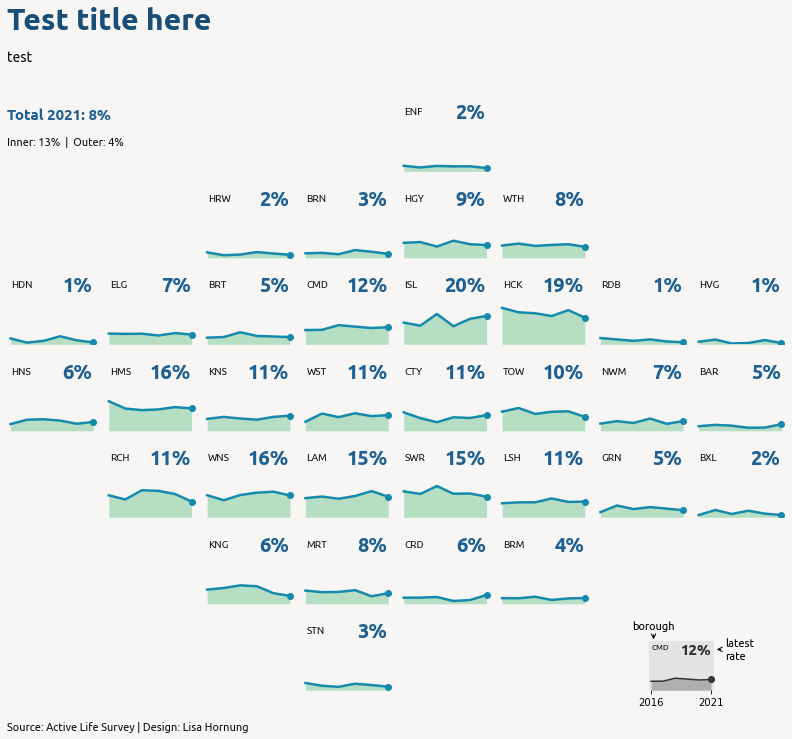

In [238]:
#========= Data
#filter data set based on input
data = df[(df["ONS Code"].isin(pos_dict.keys())) & (df["Frequency"] == frequency) & 
          (df["Purpose"]==purpose)].reset_index()

data["Display name"] = data["ONS Code"].map(display_dict)
data["pos"] = data["ONS Code"].map(pos_dict)

# ========= Layout
# Initialise Figure and define layout
#8,7 | 10, 8.75
fig,ax = plt.subplots(7,8,figsize=(12,10), sharey=True)

fig.set_facecolor(colors["background"])
plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, bottom=0.05)

#Format grid layout - remove frame + axis labels
for a in ax:
    for i in a:
        i.get_xaxis().set_visible(False)
        i.get_yaxis().set_visible(False)
        i.set_ylim(ymax=60, ymin=0)   
        i.axis('off')
        for pos in ["top", "bottom", "right", "left"]:
            i.spines[pos].set_visible(False)

#=========== Plotting
# plotting boroughs
y_values = ['2016', '2017', '2018','2019', '2020', '2021']        
x_values = [1,2,3,4,5,6]
height = max(data[y_values].max()) + 30

## Loop through all boroughs and map their values
for i in range(len(data)):
    plt.subplot(7,8,data["pos"][i])
    
    #display name of borough
    plt.text(1.05, height-10, data["Display name"][i], fontsize=10, ha="left", va='top', color="#111111",
            fontproperties=label_font)
    
    #plot area chart
    plt.fill_between(x_values,list(data.loc[i][y_values].values), zorder=1,color=colors["area"], alpha=0.5,
                    linewidth=0)    
    plt.plot(x_values,list(data.loc[i][y_values].values), zorder=2, 
             color=colors["line"],linewidth=2.5)    
    
    #plot last value dot
    plt.scatter(max(x_values),list(data.loc[i][y_values].values)[-1], zorder=3,color=colors["line"])
    
    #display most recent % value
    plt.text(max(x_values)-0.05, height-7, '{:,.0f}%'.format(list(data.loc[i][y_values].values)[-1]), 
             fontproperties=title_font, ha="right", fontsize=20, fontweight='bold', va='top', color=colors["value"])
    
    #set background colour
    plt.gca().set_xlim(xmin=0.8, xmax=6.2)
    plt.gca().set_ylim(ymax=height, ymin=0) 
    plt.gca().set_facecolor(colors["background"])
    for pos in ["top", "bottom", "right", "left"]:
         plt.gca().spines[pos].set_visible(False)

#============= Legend           
#add legend
plt.subplot(11,11,120)
plt.text(1.05,height-3,data["Display name"][0], fontsize=8, ha="left", va='top', color="#111111",fontproperties=label_font)
plt.fill_between(x_values,list(data.loc[0][y_values].values), zorder=1,color="#999999", alpha=0.7,linewidth=0)    
plt.plot(x_values,list(data.loc[0][y_values].values), zorder=2,color="#333333",linewidth=1.5)    
plt.scatter(max(x_values),list(data.loc[0][y_values].values)[-1], zorder=3,color="#333333")
plt.text(max(x_values)-0.05, height-2, '{:,.0f}%'.format(list(data.loc[0][y_values].values)[-1]), 
        fontproperties=title_font, ha="right", fontsize=15, fontweight='bold', va='top', color="#333333")
plt.gca().set_xlim(xmin=0.8, xmax=6.2)
plt.gca().set_ylim(ymax=height, ymin=0) 
plt.gca().set_facecolor("#E4E4E4")
for pos in ["top", "bottom", "right", "left"]:
    plt.gca().spines[pos].set_visible(False)
plt.gca().set_xticks([1,6], ["2016", "2021"],fontsize = 10)
plt.gca().set_yticks([])
plt.gca().annotate('latest\nrate', xy=(max(x_values)+0.3, height-10), xycoords='data', xytext=(10, 0), textcoords='offset points', 
                   fontsize=11, fontproperties=label_font,ha='left', va='center', annotation_clip=False,
                    arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.gca().annotate('borough', xy=(min(x_values)+0.2, height-1), xycoords='data', xytext=(0, 16), textcoords='offset points', 
                   fontsize=11, fontproperties=label_font,ha='center', va='center', annotation_clip=False,
                    arrowprops=dict(arrowstyle="->",facecolor='black'))



#=============== Text           
## Add titles and footer
y_pos = 1.0
x_pos = 0.05

fig.text(x_pos, y_pos, main_title, fontsize=title_fontsize, ha='left',va="top",
             fontweight="bold",  fontproperties=title_font, color=colors["title"])
fig.text(x_pos, y_pos-(title_size*0.2*0.01), subtitle, fontsize=14, ha='left',va="top",
             fontweight="normal",  fontproperties=label_font, color="#111111")
fig.text(x_pos, 0, footer, fontsize=11, ha='left',va="center",
             fontweight="normal",  fontproperties=label_font, linespacing=1.5, color="#111111")


#============ London wide stats
inner = df[(df["Area name"]=="Inner London") & (df["Frequency"]==frequency) & (df["Purpose"]==purpose)]["2021"].iloc[0]
outer = df[(df["Area name"]=="Outer London") & (df["Frequency"]==frequency) & (df["Purpose"]==purpose)]["2021"].iloc[0]
london = df[(df["Area name"]=="London") & (df["Frequency"]==frequency) & (df["Purpose"]==purpose)]["2021"].iloc[0]

fig.text(x_pos, y_pos-0.14,  "Total 2021: " + '{:,.0f}%'.format(london), fontsize=15, ha='left',va="top",
         fontweight="bold",fontproperties=title_font, color=colors["value"])
fig.text(x_pos, y_pos-0.18, "Inner: " + '{:,.0f}%'.format(inner) + "  |  Outer: " + '{:,.0f}%'.format(outer) , 
         fontsize=11, ha='left',va="top", fontweight="regular",fontproperties=label_font, color="#111111")


# ==========
#save


plt.show()

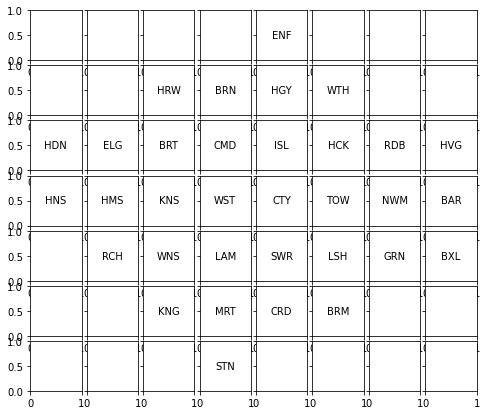

In [241]:
#filter data set based on input
data = df[(df["ONS Code"].isin(pos_dict.keys())) & (df["Frequency"] == frequency) & 
          (df["Purpose"]==purpose)].reset_index()

data["Display name"] = data["ONS Code"].map(display_dict)
data["pos"] = data["ONS Code"].map(pos_dict)

#===== Plotting
#initialise figure and define grid (7 rows, 8 columns)
fig,ax = plt.subplots(7,8, figsize=(8,7), sharey=True) #

#set padding around subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1) 

#loop through dataframe
for i in range(len(data)):
    
    #find correct subplot position
    plt.subplot(7,8,data["pos"][i])
    
    #display name of borough (set x + y pos to move around)
    plt.text(0.5,0.5, data["Display name"][i], fontsize=10, 
             ha='center', va='center')

    #code for plotting data in each tile below 
    # ---> 
    
plt.show()
